In [90]:
# Importing the necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.figure_factory as ff
from IPython.display import display, HTML

In [15]:
#1 Dataset loading and preview
data = pd.read_csv("AAPL.csv")
data.head()

Date        Open        High         Low       Close   Adj Close  \
0  2014-09-29  100.589996  100.690002   98.040001   99.620003   93.514290   
1  2014-10-06   99.949997  102.379997   98.309998  100.730003   94.556244   
2  2014-10-13  101.330002  101.779999   95.180000   97.669998   91.683792   
3  2014-10-20   98.320000  105.489998   98.220001  105.220001   98.771042   
4  2014-10-27  104.849998  108.040001  104.699997  108.000000  101.380676   

      Volume  
0  142718700  
1  280258200  
2  358539800  
3  358532900  
4  220230600

In [29]:
# 2 Data handling & visualization using Pandas, NumPy, Matplotlib, and Seaborn
# 2.1 Basic data describtion
display(HTML('<b><span style="color:red">2.1 - Basic data describtion</span></b>'))

data.info()
data.describe()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 184 entries, 0 to 183
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       184 non-null    object 
 1   Open       184 non-null    float64
 2   High       184 non-null    float64
 3   Low        184 non-null    float64
 4   Close      184 non-null    float64
 5   Adj Close  184 non-null    float64
 6   Volume     184 non-null    int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 10.2+ KB


Open        High         Low       Close   Adj Close  \
count  184.000000  184.000000  184.000000  184.000000  184.000000   
mean   127.040245  129.918098  124.340381  127.352663  123.838032   
std     24.314449   24.577906   24.176736   24.356534   25.655569   
min     92.389999   93.769997   89.470001   90.519997   87.796822   
25%    108.882499  112.362499  106.152502  109.204998  105.301765   
50%    118.895000  120.865002  116.870003  119.190002  114.999730   
75%    144.935005  147.695000  143.227493  144.704994  143.039467   
max    180.289993  183.500000  177.619995  179.979996  179.979996   

             Volume  
count  1.840000e+02  
mean   1.910168e+08  
std    8.160281e+07  
min    3.839850e+07  
25%    1.273706e+08  
50%    1.744112e+08  
75%    2.207755e+08  
max    5.003630e+08

In [43]:
# 2 Data handling & visualization using Pandas, NumPy, Matplotlib, and Seaborn
# 2.2 Statistics for each column
display(HTML('<b><span style="color:red">2.2 - Statistics for each column</span></b>'))
for col in data.drop(columns=['Date']).columns:
    arr = data[col].values
    print(f"{col}: mean={np.mean(arr):.2f}, std={np.std(arr):.2f}, min={np.min(arr)}, max={np.max(arr)}")

Open: mean=127.04, std=24.25, min=92.389999, max=180.289993
High: mean=129.92, std=24.51, min=93.769997, max=183.5
Low: mean=124.34, std=24.11, min=89.470001, max=177.619995
Close: mean=127.35, std=24.29, min=90.519997, max=179.979996
Adj Close: mean=123.84, std=25.59, min=87.796822, max=179.979996
Volume: mean=191016776.11, std=81380758.62, min=38398505, max=500363000


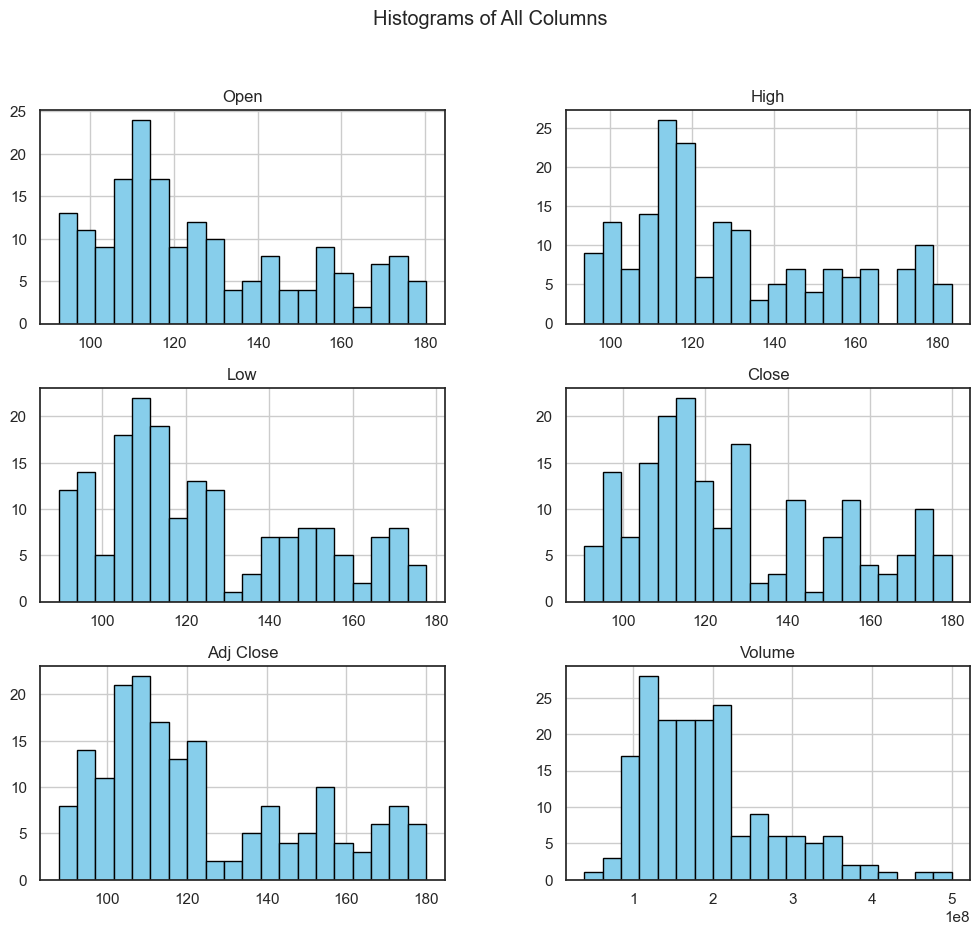

In [44]:
# 2 Data handling & visualization using Pandas, NumPy, Matplotlib, and Seaborn
# 2.3 Histograms
display(HTML('<b><span style="color:red">2.3 Histograms</span></b>'))
data.hist(bins=20, figsize=(12,10), color='skyblue', edgecolor='black')
plt.suptitle("Histograms of All Columns")
plt.show()

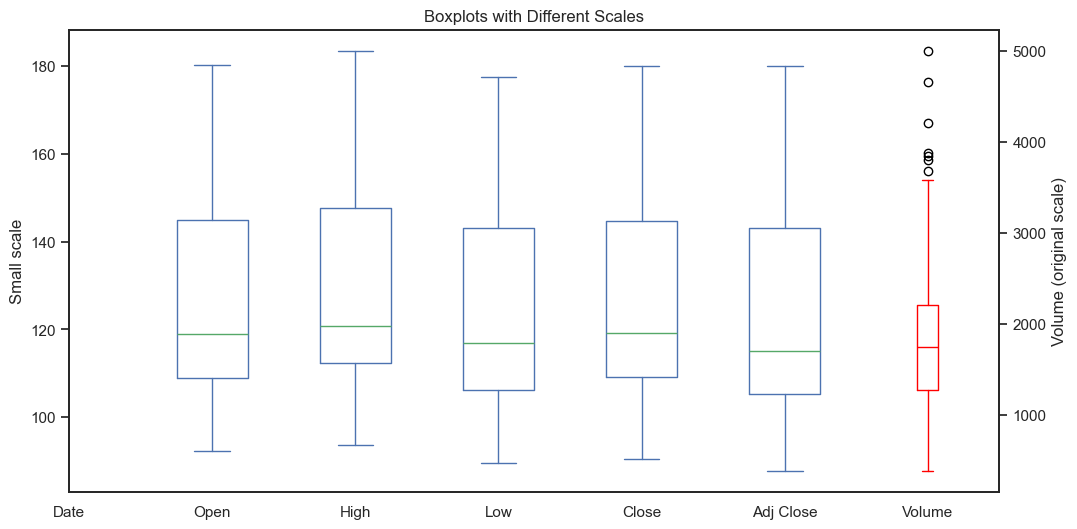

In [74]:
# 2 Data handling & visualization using Pandas, NumPy, Matplotlib, and Seaborn
# 2.4 Boxplots
display(HTML('<b><span style="color:red">2.4 Boxplots</span></b>'))

fig, ax1 = plt.subplots(figsize=(12,6))

# Columns with smaller values
cols_small = data.drop(columns=['Volume']).columns

# Boxplots for small-scale columns
data[cols_small].plot.box(ax=ax1)
ax1.set_ylabel("Small scale")

# Secondary axis for Volume
ax2 = ax1.twinx()
data[['Volume']].plot.box(ax=ax2, color='red', positions=[len(cols_small)])
ax2.set_ylabel("Volume (original scale)")

# Set x-ticks
ax1.set_xticks(range(len(cols_small)+1))
ax1.set_xticklabels(list(cols_small) + ['Volume'])

plt.title("Boxplots with Different Scales")
plt.show()


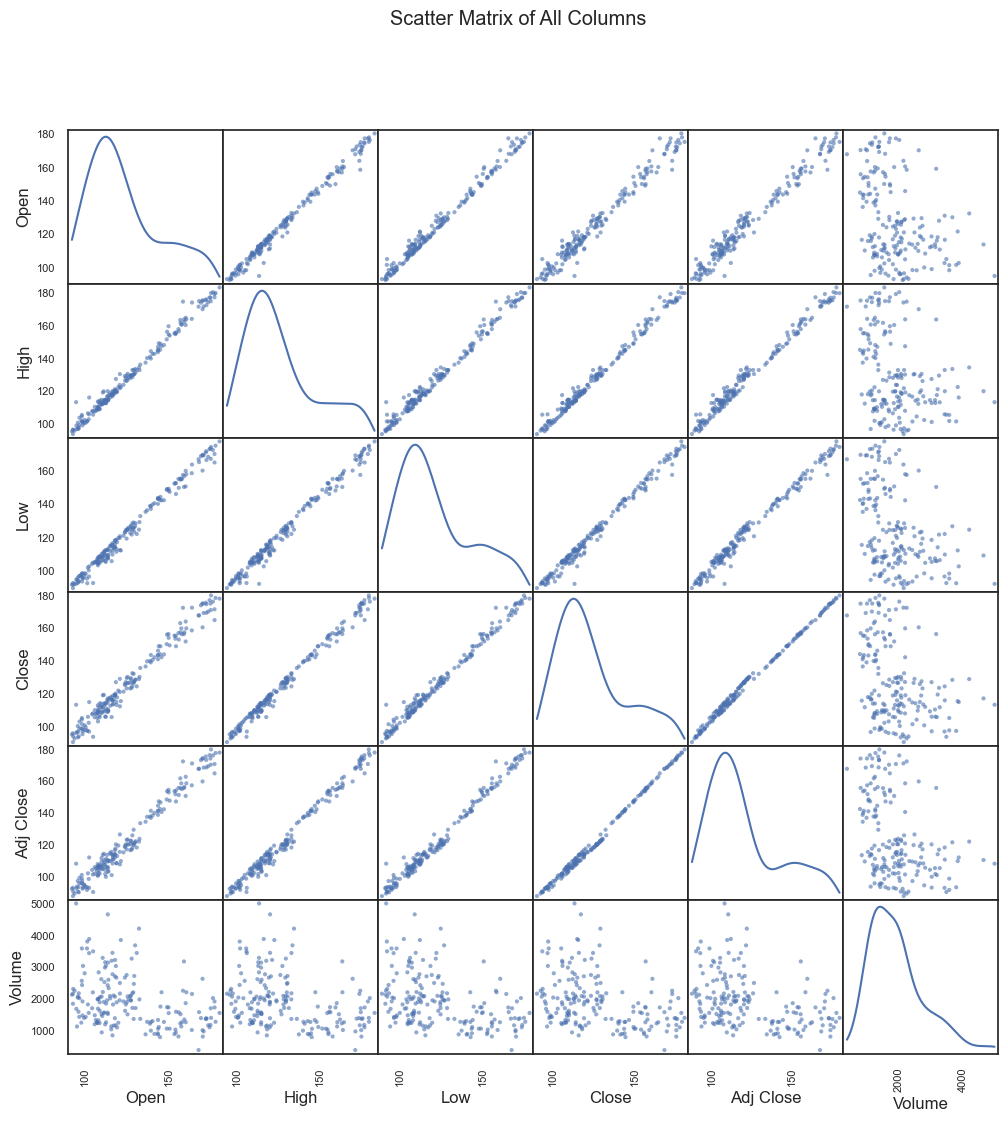

In [76]:
# 2 Data handling & visualization using Pandas, NumPy, Matplotlib, and Seaborn
# 2.5 Scatter matrix
display(HTML('<b><span style="color:red">2.5 Scatter matrix</span></b>'))

pd.plotting.scatter_matrix(data, figsize=(12,12), diagonal='kde', alpha=0.6)
plt.suptitle("Scatter Matrix of All Columns")
plt.show()

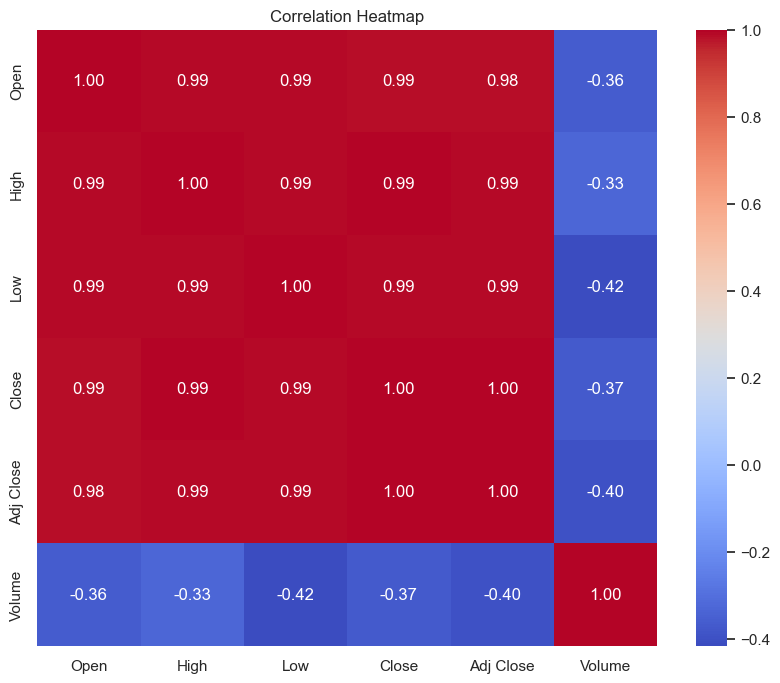

In [80]:
# 2 Data handling & visualization using Pandas, NumPy, Matplotlib, and Seaborn
# 2.6 Correlation heatmap
display(HTML('<b><span style="color:red">2.6 Correlation heatmap</span></b>'))

plt.figure(figsize=(10,8))
sns.heatmap(data.select_dtypes(include='number').corr(), annot=True, fmt=".2f", cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()

In [83]:
# 2 Data handling & visualization using Pandas, NumPy, Matplotlib, and Seaborn
# 2.7 Rolling statistics
display(HTML('<b><span style="color:red">2.7 Rolling statistics</span></b>'))

rolling_window = 3
data_rolling = data.select_dtypes(include='number').rolling(window=rolling_window).mean()
print(f"\nRolling mean (window={rolling_window}):")
print(data_rolling.head(10))


Rolling mean (window=3):
         Open        High         Low       Close   Adj Close       Volume
0         NaN         NaN         NaN         NaN         NaN          NaN
1         NaN         NaN         NaN         NaN         NaN          NaN
2  100.623332  101.616666   97.176666   99.340001   93.251442  2605.055667
3   99.866666  103.216665   97.236666  101.206667   95.003693  3324.436333
4  101.500000  105.103333   99.366666  103.630000   97.278503  3124.344333
5  103.796666  107.943334  103.546666  107.410001  100.826828  2595.721333
6  107.363332  110.843335  106.940000  110.396667  103.785372  2084.500667
7  110.503332  114.020002  109.806669  113.220001  106.593689  2128.447667
8  113.379997  117.170001  112.773336  116.526667  109.859055  2068.184333
9  116.643331  118.856667  113.730001  116.800000  110.116745  2272.927667


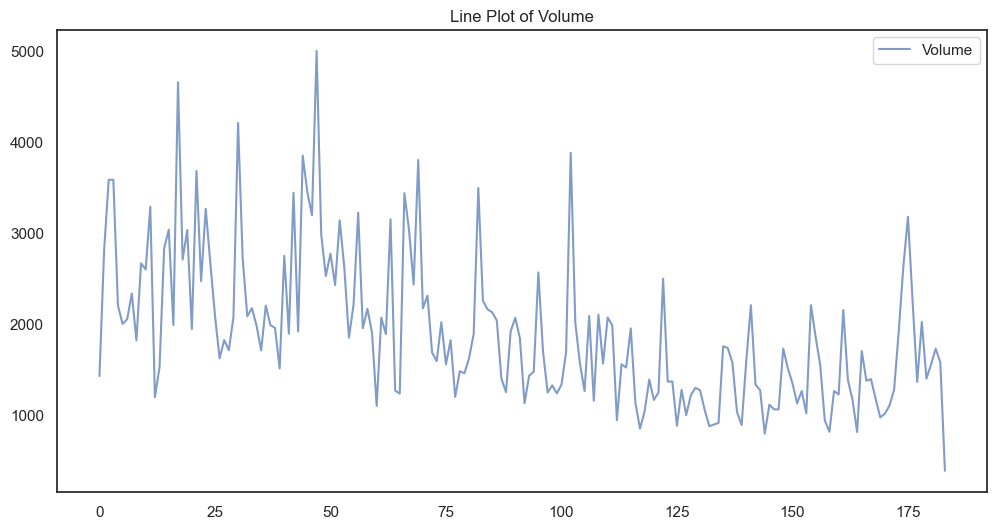

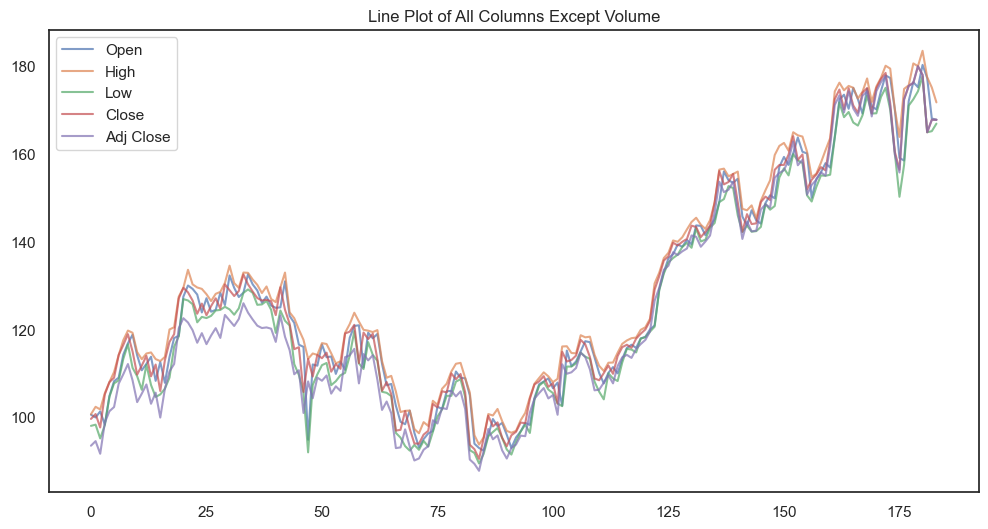

In [89]:
# 2 Data handling & visualization using Pandas, NumPy, Matplotlib, and Seaborn
# 2.8 Line plots
display(HTML('<b><span style="color:red">2.8 Line plots</span></b>'))

data[['Volume']].plot.line(figsize=(12,6), alpha=0.7)
plt.title("Line Plot of Volume")
plt.show()

others = data.columns.drop('Volume')
data[others].plot.line(figsize=(12,6), alpha=0.7)
plt.title("Line Plot of All Columns Except Volume")
plt.show()

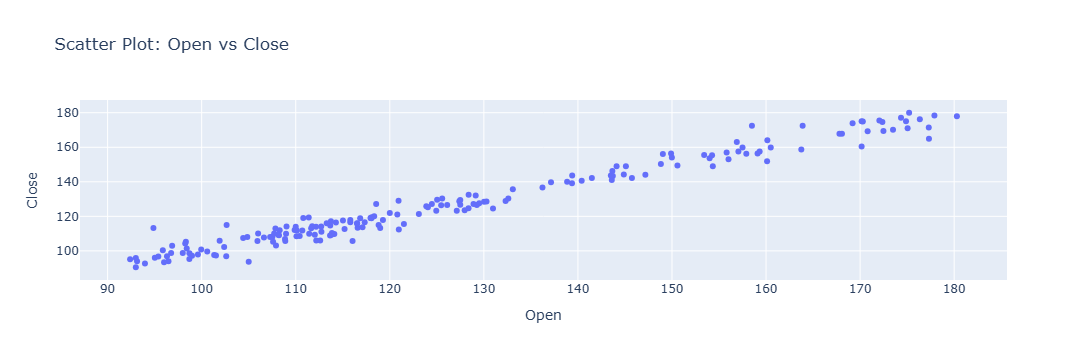

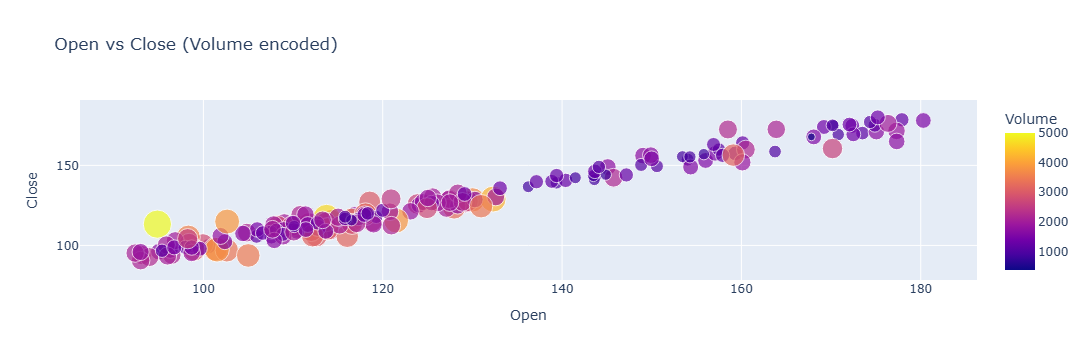

In [94]:
# 3 Data handling & visualization using plotly
# 3.1 Scatter plots
display(HTML('<b><span style="color:red">3.1 Scatter plots</span></b>'))

# Simple scatter plot
fig = px.scatter(data, x='Open', y='Close', title='Scatter Plot: Open vs Close')
fig.show()

# Scatter plot with Volume as color and size
fig = px.scatter(data, x='Open', y='Close', color='Volume',
                 size='Volume', title='Open vs Close (Volume encoded)')
fig.show()

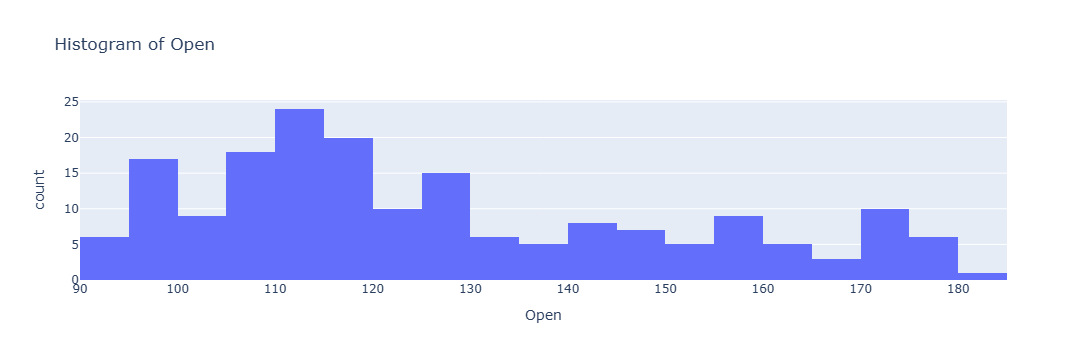

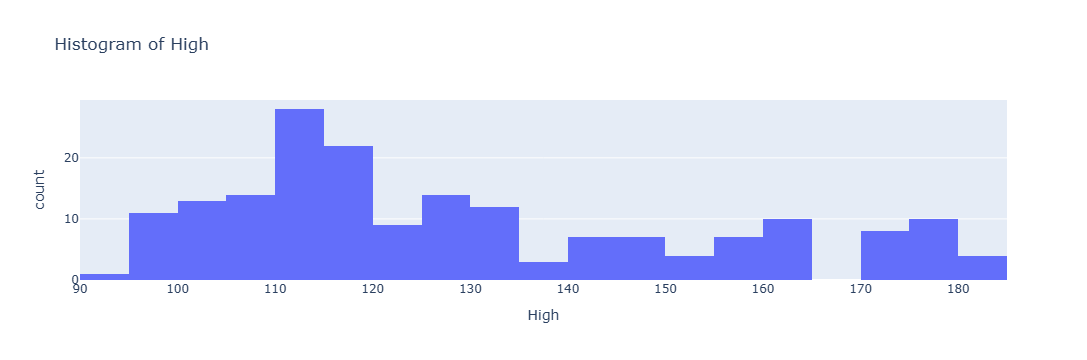

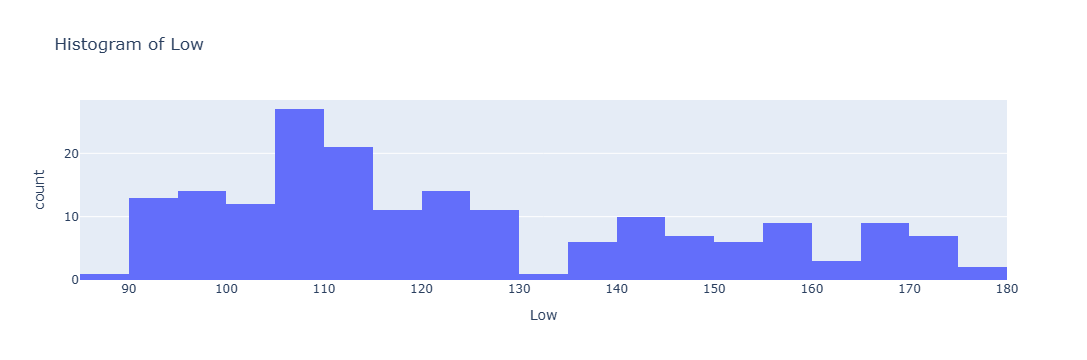

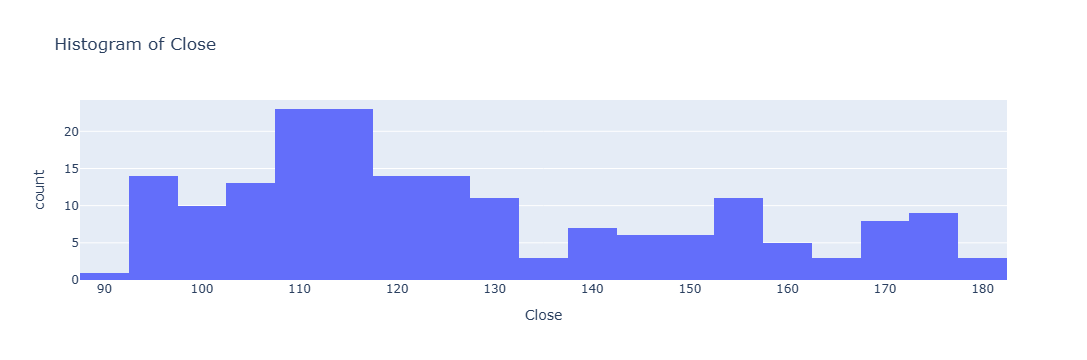

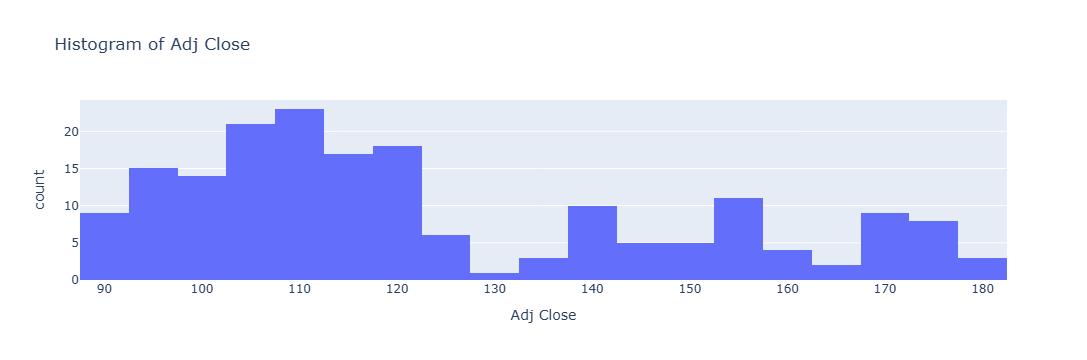

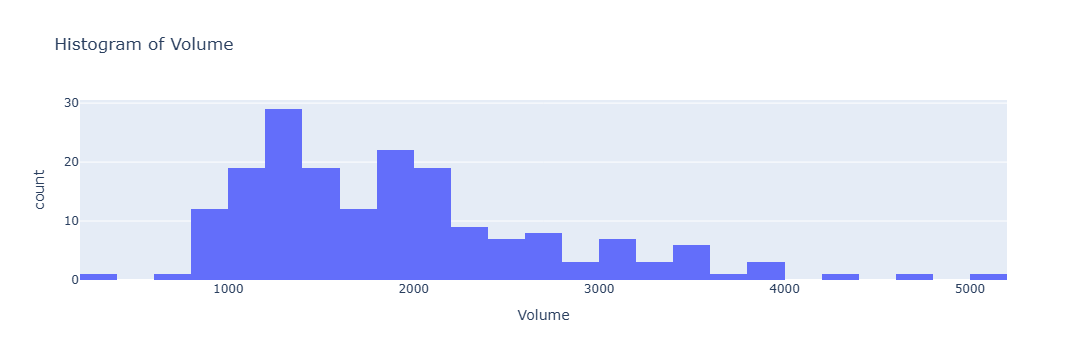

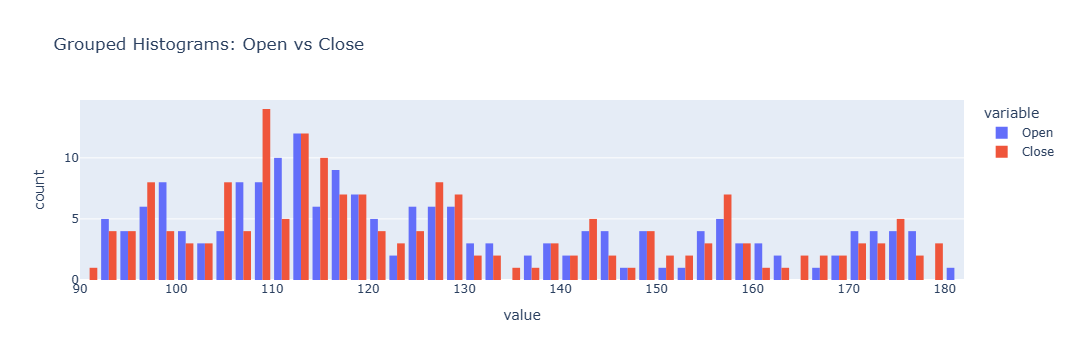

In [113]:
# 3 Data handling & visualization using plotly
# 3.2 Histograms
display(HTML('<b><span style="color:red">3.2 Histograms</span></b>'))

import plotly.express as px

for col in data.select_dtypes(include='number').columns:
    fig = px.histogram(data, x=col, nbins=30, title=f'Histogram of {col}')
    fig.show()

fig = px.histogram(data, x=['Open', 'Close'], barmode='group', nbins=60, title='Grouped Histograms: Open vs Close')
fig.show()


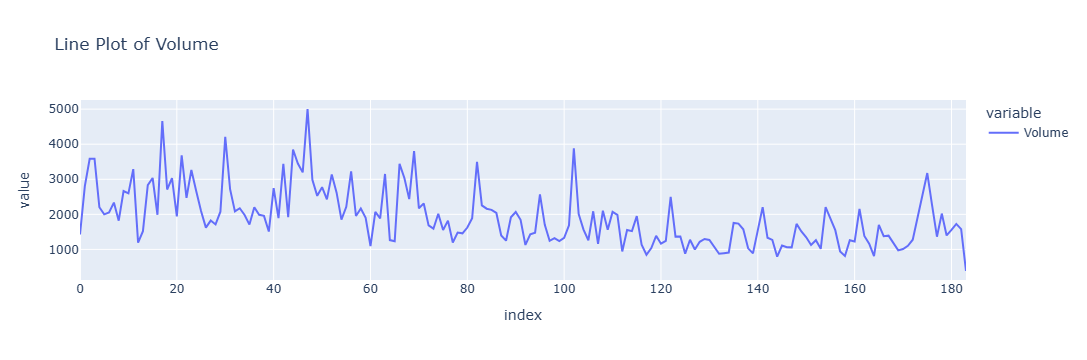

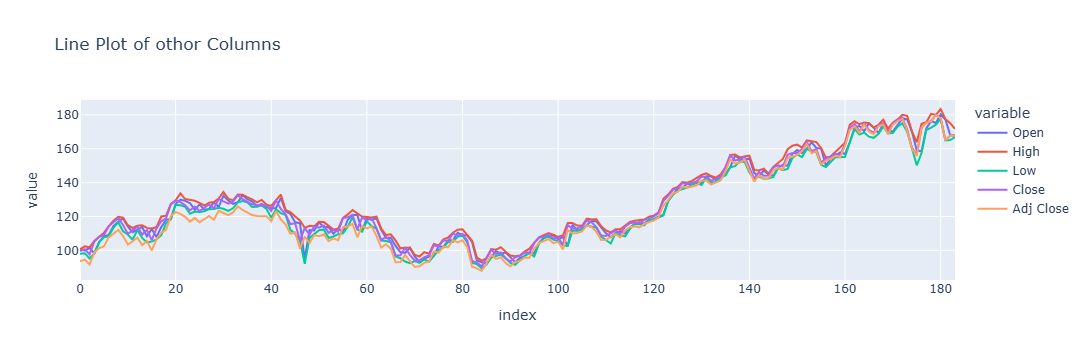

In [105]:
# 3 Data handling & visualization using plotly
# 3.3 Line plots
display(HTML('<b><span style="color:red">3.3 Line plots</span></b>'))

fig = px.line(data, y=data.columns[6:7], title='Line Plot of Volume')
fig.show()

fig = px.line(data, y=data.columns[1:6], title='Line Plot of othor Columns')
fig.show()

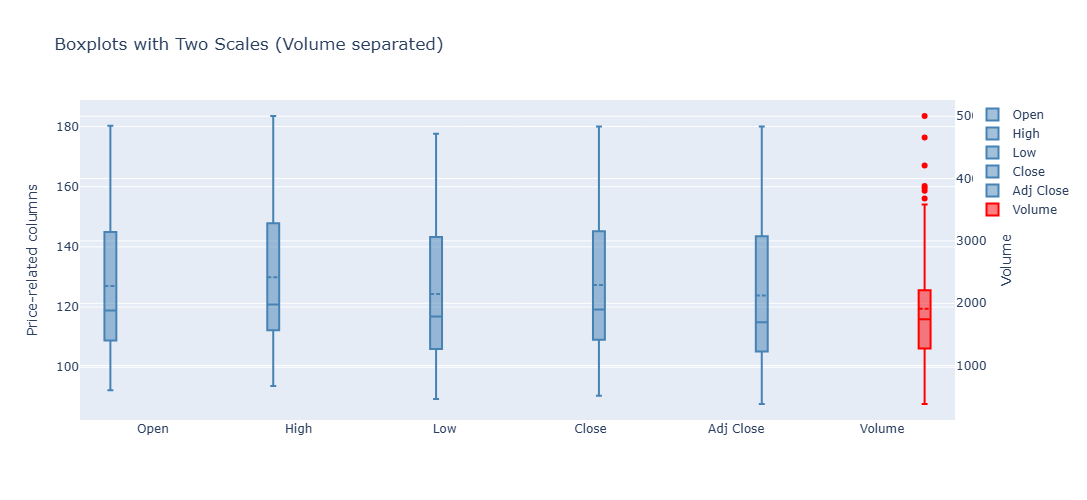

In [107]:
# 3 Data handling & visualization using plotly
# 3.4 Box plots
display(HTML('<b><span style="color:red">3.3 Line plots</span></b>'))

import plotly.graph_objects as go

fig = go.Figure()

# Boxplots for small-scale columns
small_cols = ['Open', 'High', 'Low', 'Close', 'Adj Close']
for col in small_cols:
    fig.add_trace(go.Box(y=data[col], name=col, boxmean=True, marker_color='steelblue', yaxis='y1'))

# Boxplot for Volume (on second y-axis)
fig.add_trace(go.Box(y=data['Volume'], name='Volume', boxmean=True, marker_color='red', yaxis='y2'))

# Define dual y-axes
fig.update_layout(
    title="Boxplots with Two Scales (Volume separated)",
    yaxis=dict(title="other columns", side='left'),
    yaxis2=dict(title="Volume", overlaying='y', side='right'),
    boxmode='group',
    width=900,
    height=500
)

fig.show()

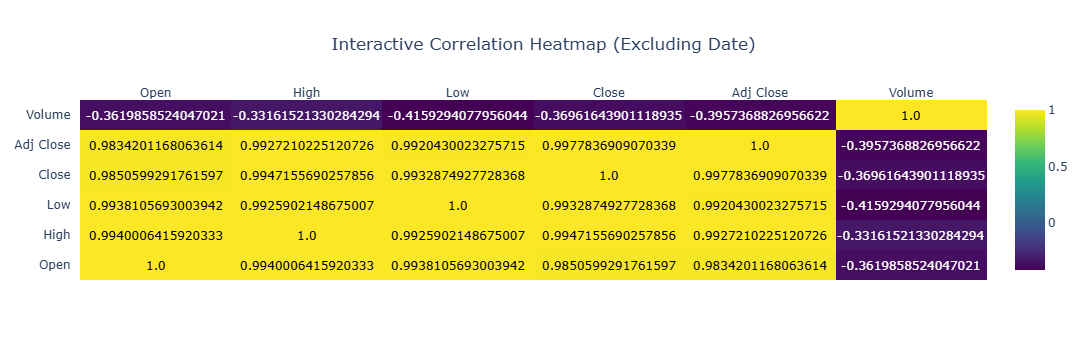

In [110]:
# 3 Data handling & visualization using plotly
# 3.5 Correlation heatmap
display(HTML('<b><span style="color:red">3.5 Correlation heatmap</span></b>'))

import plotly.figure_factory as ff

# Exclude the Date column correctly
data_no_date = data.drop(columns=['Date'], errors='ignore')

# Compute correlation only for numeric columns
corr_matrix = data_no_date.select_dtypes(include='number').corr().values

# Create interactive annotated heatmap
fig = ff.create_annotated_heatmap(
    z=corr_matrix,
    x=list(data_no_date.select_dtypes(include='number').columns),
    y=list(data_no_date.select_dtypes(include='number').columns),
    colorscale='Viridis',
    showscale=True
)

fig.update_layout(
    title_text="Interactive Correlation Heatmap (Excluding Date)",
    title_x=0.5
)

fig.show()

In [129]:
# 4 Applying the same techniques to another dataset from Kaggle. The chosen dataset is a cleaned dataset sourced from the World Bank's development indicators, containing annual Ocean Health Index (OHI) scores for 194 countries and territories (2015-2024)
# 4.1 Dataset loading and preview
display(HTML('<b><span style="color:red">4.1 Dataset loading and preview</span></b>'))

data_ocean = pd.read_csv("ocean_health_index.csv")
data.head()

Date        Open        High         Low       Close   Adj Close  \
0  2014-09-29  100.589996  100.690002   98.040001   99.620003   93.514290   
1  2014-10-06   99.949997  102.379997   98.309998  100.730003   94.556244   
2  2014-10-13  101.330002  101.779999   95.180000   97.669998   91.683792   
3  2014-10-20   98.320000  105.489998   98.220001  105.220001   98.771042   
4  2014-10-27  104.849998  108.040001  104.699997  108.000000  101.380676   

     Volume  
0  1427.187  
1  2802.582  
2  3585.398  
3  3585.329  
4  2202.306

In [130]:
# 4 Applying the same techniques to the "ocean_health_index" dataset.
# 4.2 Basic data describtion
display(HTML('<b><span style="color:red">4.2 - Basic data describtion</span></b>'))

data_ocean.info()
data_ocean.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 194 entries, 0 to 193
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   REF_AREA  194 non-null    object 
 1   2015      194 non-null    float64
 2   2016      194 non-null    float64
 3   2017      194 non-null    float64
 4   2018      194 non-null    float64
 5   2019      194 non-null    float64
 6   2020      194 non-null    float64
 7   2021      194 non-null    float64
 8   2022      194 non-null    float64
 9   2023      194 non-null    float64
 10  2024      194 non-null    float64
dtypes: float64(10), object(1)
memory usage: 16.8+ KB


2015        2016        2017        2018        2019        2020  \
count  194.000000  194.000000  194.000000  194.000000  194.000000  194.000000   
mean    70.746031   70.863247   70.788247   70.984536   71.217320   71.448144   
std      6.019021    6.025836    6.173841    6.195274    6.175477    6.139694   
min     51.230000   50.930000   51.110000   52.160000   51.520000   49.620000   
25%     66.992500   67.337500   67.337500   67.607500   67.932500   68.177500   
50%     71.120000   71.185000   71.200000   71.450000   71.770000   71.765000   
75%     74.872500   74.777500   74.825000   75.162500   75.227500   75.205000   
max     83.490000   83.440000   84.350000   85.030000   85.070000   86.920000   

             2021        2022        2023        2024  
count  194.000000  194.000000  194.000000  194.000000  
mean    71.356649   71.382062   66.585361   66.761649  
std      6.160548    6.234617    6.643286    6.602835  
min     49.250000   49.140000   47.540000   46.870000  
25%     68.335000   68.600000   62.330000   62.960000  
50%     71.620000   71.540000   66.640000   66.645000  
75%     75.167500   75.377500   71.155000   70.867500  
max     86.790000   86.320000   84.600000   83.460000

In [131]:
# 4 Applying the same techniques to the "ocean_health_index" dataset.
# 4.3 Statistics for each year
display(HTML('<b><span style="color:red">4.3 - Statistics for each year</span></b>'))
for col in data_ocean.drop(columns=['REF_AREA']).columns:
    arr = data_ocean[col].values
    print(f"{col}: mean={np.mean(arr):.2f}, std={np.std(arr):.2f}, min={np.min(arr)}, max={np.max(arr)}")

2015: mean=70.75, std=6.00, min=51.23, max=83.49
2016: mean=70.86, std=6.01, min=50.93, max=83.44
2017: mean=70.79, std=6.16, min=51.11, max=84.35
2018: mean=70.98, std=6.18, min=52.16, max=85.03
2019: mean=71.22, std=6.16, min=51.52, max=85.07
2020: mean=71.45, std=6.12, min=49.62, max=86.92
2021: mean=71.36, std=6.14, min=49.25, max=86.79
2022: mean=71.38, std=6.22, min=49.14, max=86.32
2023: mean=66.59, std=6.63, min=47.54, max=84.6
2024: mean=66.76, std=6.59, min=46.87, max=83.46


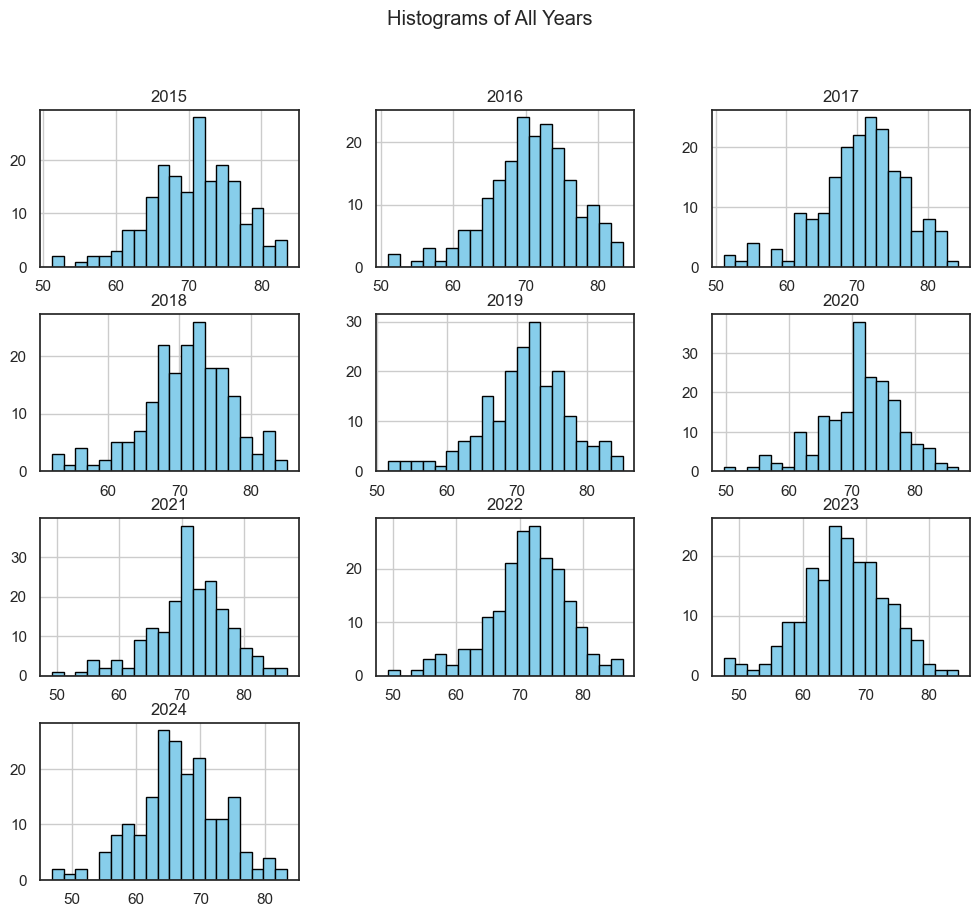

In [132]:
# 4 Applying the same techniques to the "ocean_health_index" dataset.
# 4.4 Histograms
display(HTML('<b><span style="color:red">4.4 Histograms</span></b>'))

data_ocean.hist(bins=20, figsize=(12,10), color='skyblue', edgecolor='black')
plt.suptitle("Histograms of All Years")
plt.show()

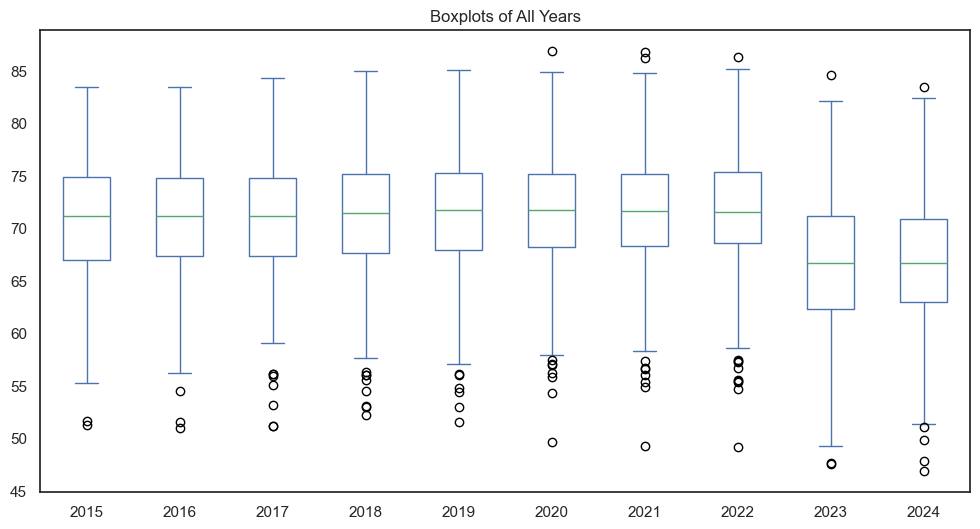

In [133]:
# 4 Applying the same techniques to the "ocean_health_index" dataset.
# 4.5 Boxplots
display(HTML('<b><span style="color:red">4.5 Boxplots</span></b>'))

data_ocean.plot.box(figsize=(12,6))
plt.title("Boxplots of All Years")
plt.show()

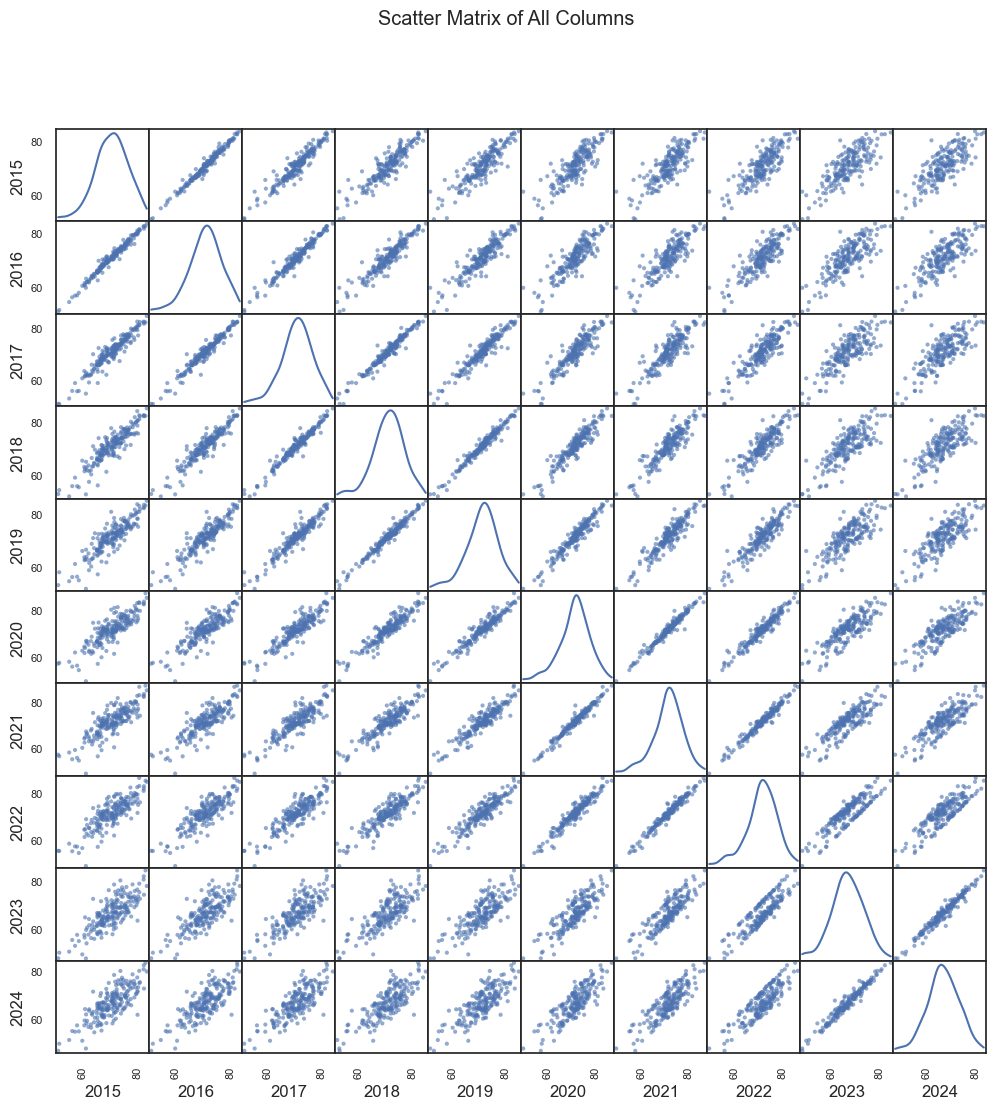

In [134]:
# 4 Applying the same techniques to the "ocean_health_index" dataset.
# 4.5 Scatter matrix
display(HTML('<b><span style="color:red">4.5 Scatter matrix</span></b>'))

pd.plotting.scatter_matrix(data_ocean, figsize=(12,12), diagonal='kde', alpha=0.6)
plt.suptitle("Scatter Matrix of All Years")
plt.show()

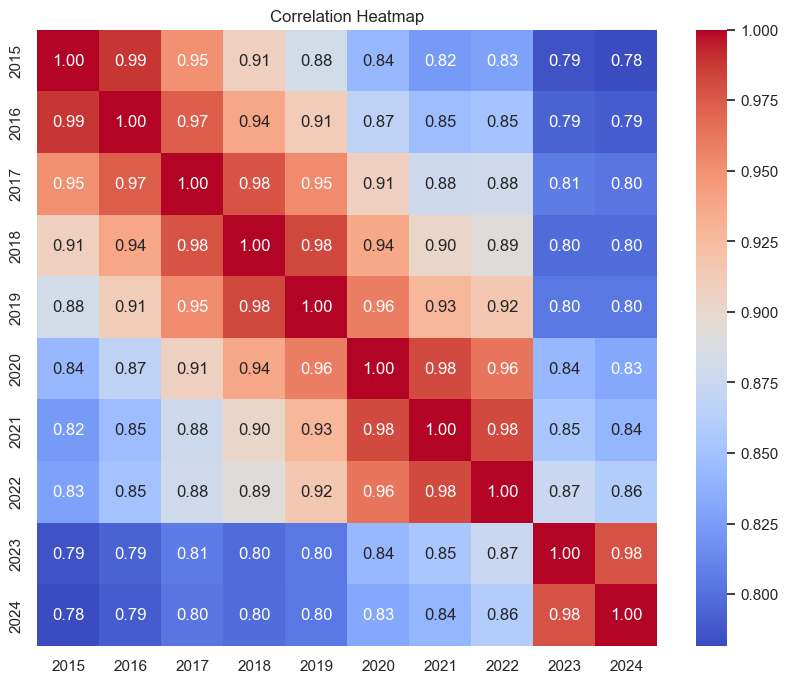

In [135]:
# 4 Applying the same techniques to the "ocean_health_index" dataset.
# 4.6 Correlation heatmap
display(HTML('<b><span style="color:red">4.6 Correlation heatmap</span></b>'))

plt.figure(figsize=(10,8))
sns.heatmap(data_ocean.select_dtypes(include='number').corr(), annot=True, fmt=".2f", cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()

In [137]:
# 4 Applying the same techniques to the "ocean_health_index" dataset.
# 4.7 Rolling statistics
display(HTML('<b><span style="color:red">4.7 Rolling statistics</span></b>'))

rolling_window = 3
data_rolling = data_ocean.select_dtypes(include='number').rolling(window=rolling_window).mean()
print(f"\nRolling mean (window={rolling_window}):")
print(data_rolling.head(10))


Rolling mean (window=3):
        2015       2016       2017       2018       2019       2020  \
0        NaN        NaN        NaN        NaN        NaN        NaN   
1        NaN        NaN        NaN        NaN        NaN        NaN   
2  69.460000  69.893333  69.683333  71.240000  71.023333  70.020000   
3  68.136667  68.186667  67.870000  67.816667  66.573333  67.303333   
4  70.776667  71.450000  71.453333  71.726667  71.753333  72.920000   
5  74.986667  75.683333  76.166667  76.616667  76.676667  77.780000   
6  75.740000  76.803333  77.093333  77.183333  77.490000  77.373333   
7  75.450000  75.530000  75.810000  75.376667  75.283333  77.043333   
8  72.633333  72.336667  72.230000  71.230000  70.973333  72.663333   
9  75.986667  75.510000  75.393333  74.563333  74.173333  75.343333   

        2021       2022       2023       2024  
0        NaN        NaN        NaN        NaN  
1        NaN        NaN        NaN        NaN  
2  69.656667  68.760000  64.480000  65.420000  


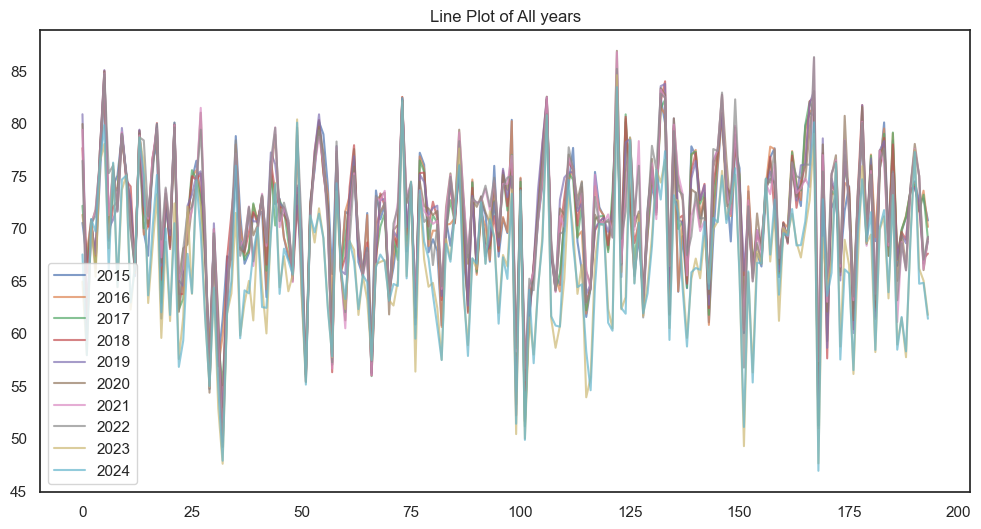

In [139]:
# 4 Applying the same techniques to the "ocean_health_index" dataset.
# 4.8 Line plots
display(HTML('<b><span style="color:red">4.8 Line plots</span></b>'))

data_ocean.plot.line(figsize=(12,6), alpha=0.7)
plt.title("Line Plot of All years")
plt.show()

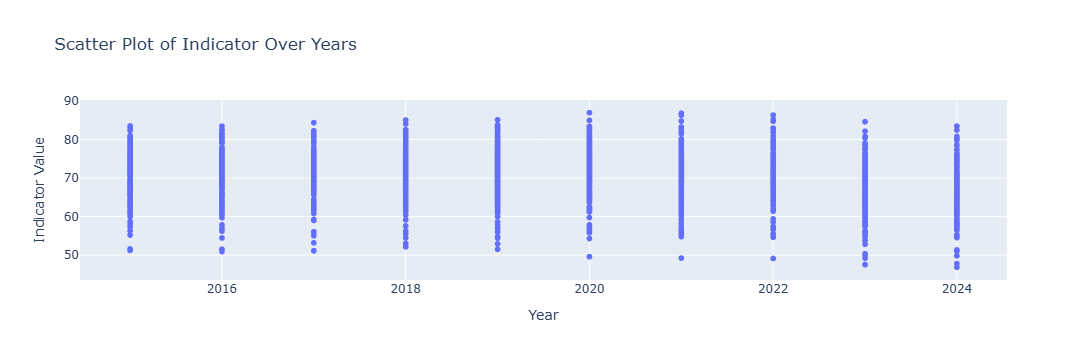

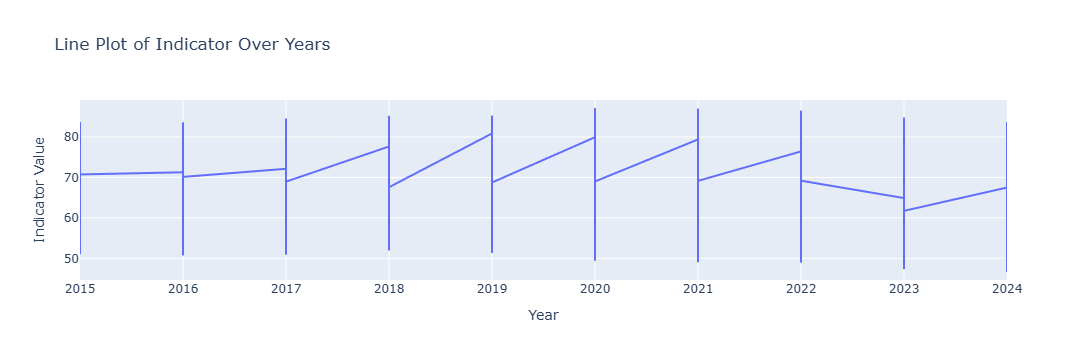

In [153]:
# 4 Applying the same techniques to the "ocean_health_index" dataset.
# 4.9 Scatter plots using Plotly
display(HTML('<b><span style="color:red">4.9 Scatter plots using Plotly</span></b>'))

year_cols = [str(y) for y in range(2015, 2025)]  # list of years as strings
long_data = data_ocean[year_cols].melt(var_name='Year', value_name='Indicator')
long_data['Year'] = long_data['Year'].astype(int)  # convert to integers

fig = px.scatter(long_data, x='Year', y='Indicator', title='Scatter Plot of Indicator Over Years', labels={'Indicator': 'Indicator Value', 'Year': 'Year'})
fig.show()

fig = px.line(long_data, x='Year', y='Indicator', title='Line Plot of Indicator Over Years', labels={'Indicator': 'Indicator Value', 'Year': 'Year'})
fig.show()

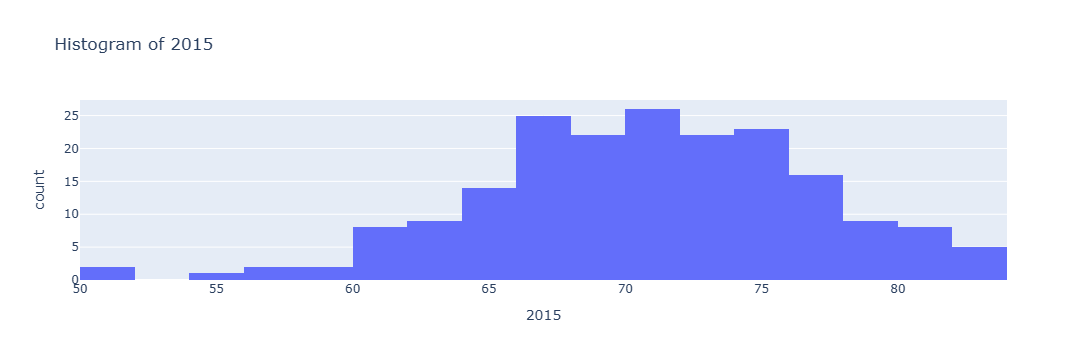

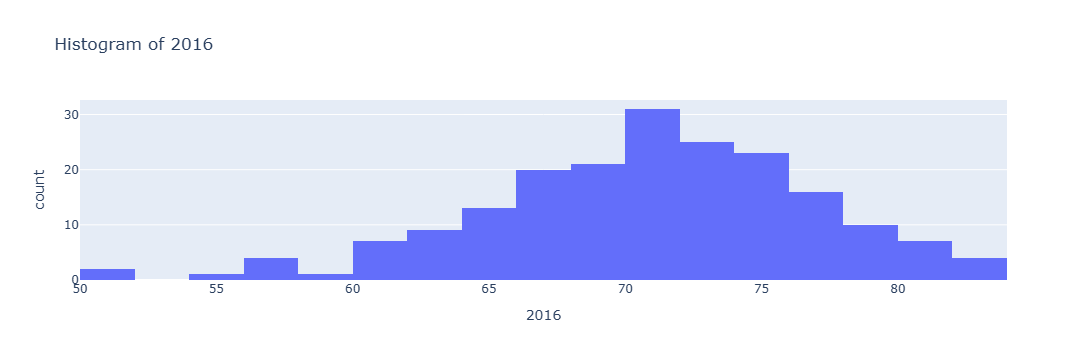

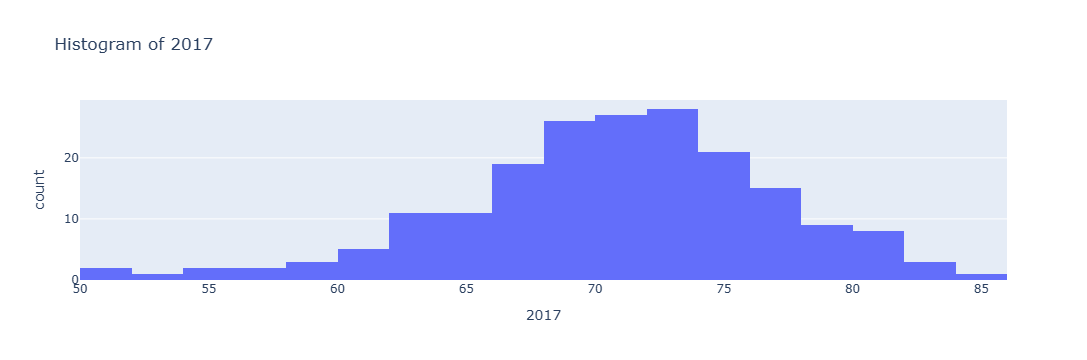

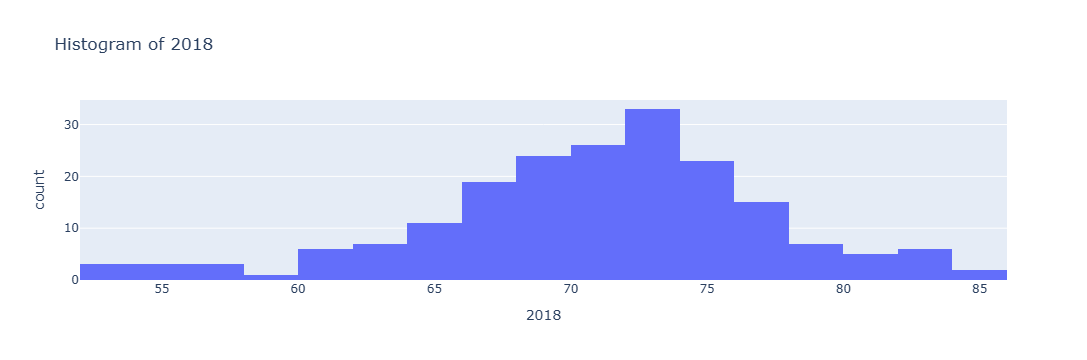

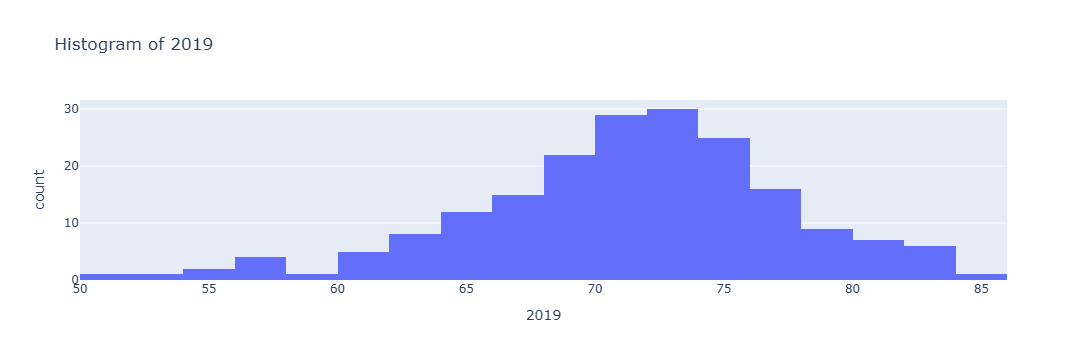

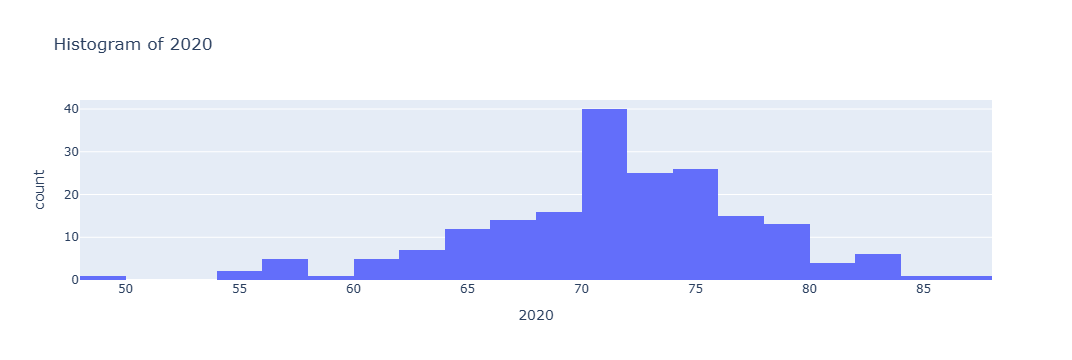

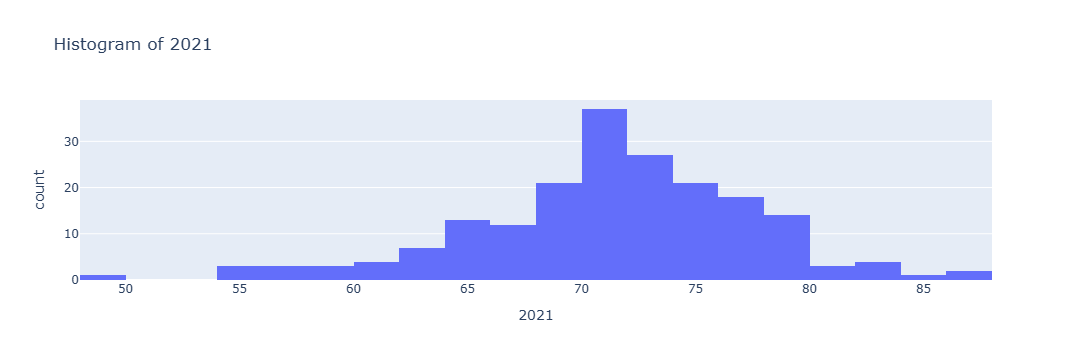

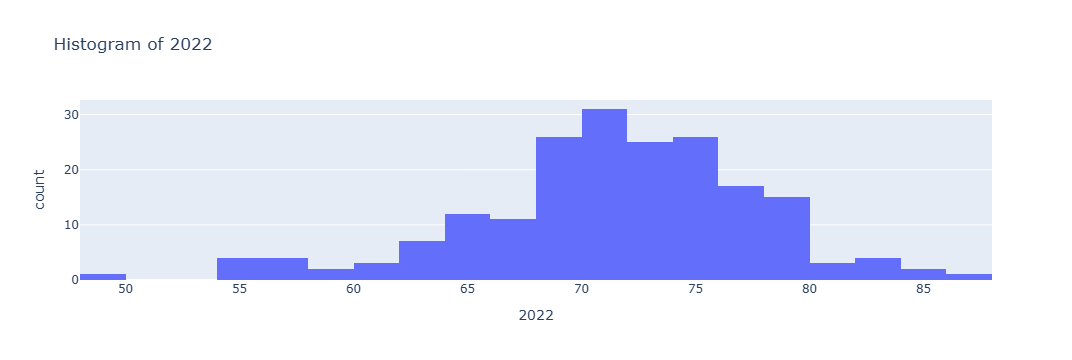

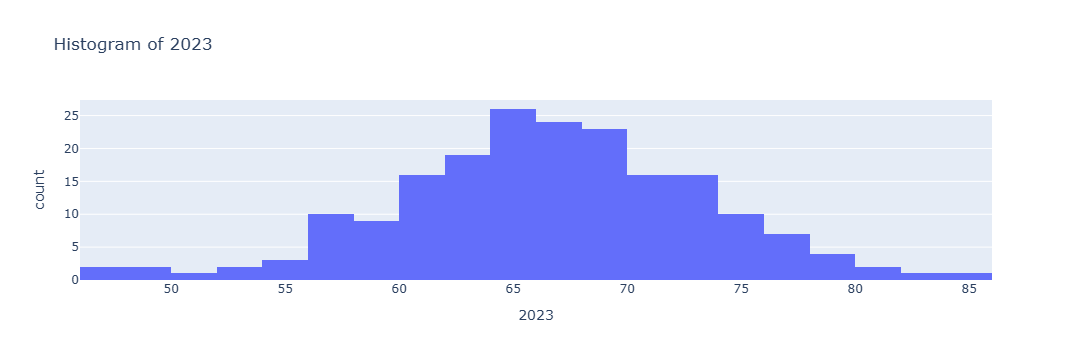

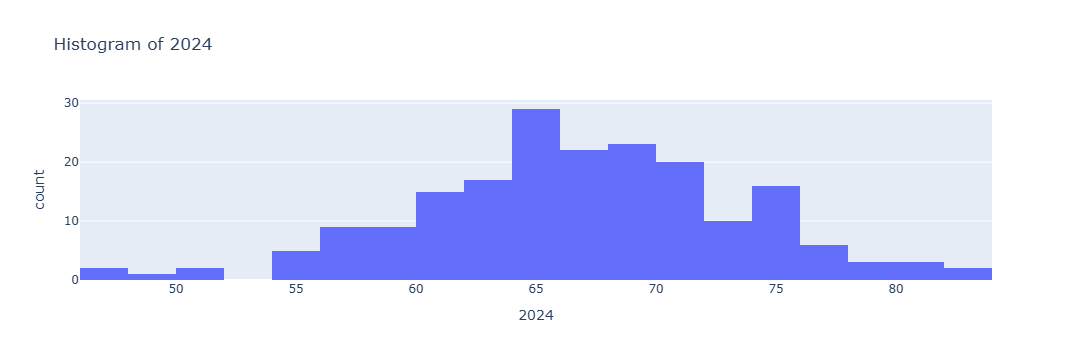

In [149]:
# 4 Applying the same techniques to the "ocean_health_index" dataset.
# 4.10 Histograms using Plotly
display(HTML('<b><span style="color:red">4.10 Histograms using Plotly</span></b>'))

for col in data_ocean.select_dtypes(include='number').columns:
    fig = px.histogram(data_ocean, x=col, nbins=30, title=f'Histogram of {col}')
    fig.show()

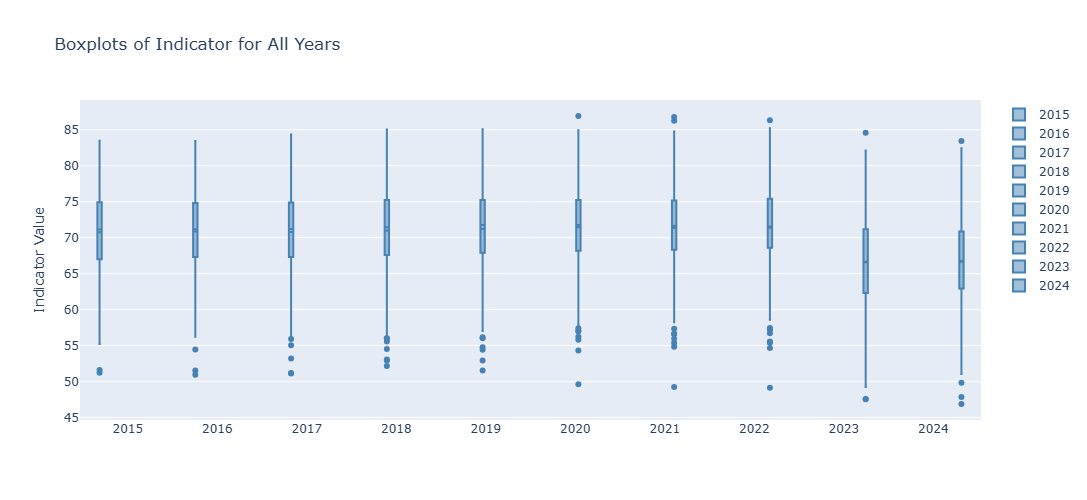

In [157]:
# 4 Applying the same techniques to the "ocean_health_index" dataset.
# 4.11 Box plots using Plotly
display(HTML('<b><span style="color:red">4.11 Box plots using Plotly</span></b>'))

year_cols = [str(y) for y in range(2015, 2025)]  # 2015–2024
fig = go.Figure()

# Add a boxplot for each year
for col in year_cols:
    fig.add_trace(go.Box(y=data_ocean[col], name=col, boxmean=True, marker_color='steelblue'))

# Layout settings
fig.update_layout(title="Boxplots of Indicator for All Years", yaxis=dict(title="Indicator Value"), boxmode='group', width=900, height=500)

fig.show()

